In [22]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt, pydotplus
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import tree
from IPython.display import Image, display

In [ ]:
from sklearn.metrics import classification_report
url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)

In [ ]:
titanic.columns

In [4]:
titanic.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
cols_to_del = { 'PassengerId', 'Survived', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'}
#X = titanic.copy(deep=True)
X= titanic.drop(cols_to_del, axis=1)
Y = titanic.Survived
X.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,male,22.0,1,0
1,1,female,38.0,1,0
2,3,female,26.0,0,0
3,1,female,35.0,1,0
4,3,male,35.0,0,0


Survived    0    1
Sex               
female     81  233
male      468  109


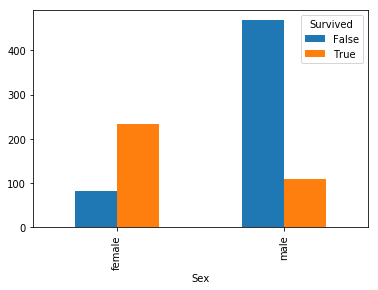

In [6]:
%matplotlib inline
print(pd.crosstab(titanic.Sex, titanic.Survived))
pd.crosstab(titanic.Sex, titanic.Survived.astype(bool)).plot(kind= 'bar')
#plt.show()


In [7]:
print(X.Sex.unique()) #Befor encoding
le = preprocessing.LabelEncoder()
X = X.apply(le.fit_transform) # need to check if there is more than one categorical column how this works
X.head()

['male' 'female']


,Pclass,Sex,Age,SibSp,Parch
0,2,1,28,1,0
1,0,0,51,1,0
2,2,0,34,0,0
3,0,0,47,1,0
4,2,1,47,0,0


In [8]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5,random_state=2)
dtree.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best')

In [9]:
y_pred = dtree.predict(X)

# how did our model perform?
print("Total Records in Data:",len(X))
count_misclassified = (Y != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(Y, y_pred)
print('All Data Accuracy: {:.2f}'.format(accuracy))

Total Records in Data: 891
Misclassified samples: 142
All Data Accuracy: 0.84


In [10]:
X_train,  X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state =3)

In [11]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(596, 5)
(596,)
(295, 5)
(295,)


In [12]:
dtree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5,random_state=2)
dtree_model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best')

In [13]:
y_train_pred = dtree_model.predict(X_train)

# how did our model perform?
print("Total Records in Training Data:",len(X_train))
count_misclassified = (Y_train != y_train_pred).sum()
print('Training Data Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(Y_train, y_train_pred)
print('Training Data Accuracy: {:.2f}'.format(accuracy))

Total Records in Training Data: 596
Training Data Misclassified samples: 83
Training Data Accuracy: 0.86


In [14]:
y_test_pred = dtree_model.predict(X_test)

# how did our model perform?
print("Total Records in Testing Data:",len(X_test))
count_misclassified = (Y_test != y_test_pred).sum()
print('Testing Data Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(Y_test, y_test_pred)
print('Testing Data Accuracy: {:.2f}'.format(accuracy))

Total Records in Testing Data: 295
Testing Data Misclassified samples: 62
Testing Data Accuracy: 0.79


In [15]:
from sklearn.cross_validation import cross_val_score

In [16]:
# Cross Validation with Entire Set of Data

#Cross Val Score Parameters (# Model to test # Target variable # Scoring metric # Cross validation folds)
scores = cross_val_score(estimator= dtree, X= X, y = Y, scoring = "accuracy", cv=10) 
print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[ 0.7         0.78888889  0.74157303  0.82022472  0.83146067  0.74157303
  0.73033708  0.79775281  0.85393258  0.81818182]
Average accuracy:  0.782392463965


In [17]:
# Cross Validation with Training Set of Data

scores = cross_val_score(estimator= dtree_model, X= X_train, y = Y_train, scoring = "accuracy", cv=10) 
print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[ 0.75        0.76666667  0.86666667  0.86666667  0.81666667  0.83333333
  0.76666667  0.91525424  0.76271186  0.84482759]
Average accuracy:  0.818946035457


In [18]:
# Cross Validation with Testing Set of Data

scores = cross_val_score(estimator= dtree_model, X= X_test, y = Y_test, scoring = "accuracy", cv=10) 
print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())


Accuracy per fold: 
[ 0.83333333  0.73333333  0.73333333  0.7         0.73333333  0.68965517
  0.65517241  0.72413793  0.72413793  0.75862069]
Average accuracy:  0.728505747126
